In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('i7.csv', header = None, sep = ':', names = ['device','batch_size','latency','throughput','model','precision'])
data.head(10)

,device,batch_size,latency,throughput,model,precision
0,cpu_openvino,1,53.82,18.58,vit_b_16,FP16
1,gpu_openvino,1,282.68,3.54,vit_b_16,FP16
2,cpu_openvino,1,37.76,26.48,vgg11,FP16
3,gpu_openvino,1,15.92,62.83,vgg11,FP16
4,cpu_openvino,1,18.11,55.20,resnet50,FP16
5,gpu_openvino,1,13.59,73.56,resnet50,FP16
6,cpu_openvino,2,152.57,13.11,vit_b_16,FP16
7,gpu_openvino,2,307.09,6.51,vit_b_16,FP16
8,cpu_openvino,2,69.22,28.89,vgg11,FP16
9,gpu_openvino,2,70.36,28.43,vgg11,FP16


In [3]:
data['machine'] = 'i7'
data.head(10)

,device,batch_size,latency,throughput,model,precision,machine
0,cpu_openvino,1,53.82,18.58,vit_b_16,FP16,i7
1,gpu_openvino,1,282.68,3.54,vit_b_16,FP16,i7
2,cpu_openvino,1,37.76,26.48,vgg11,FP16,i7
3,gpu_openvino,1,15.92,62.83,vgg11,FP16,i7
4,cpu_openvino,1,18.11,55.20,resnet50,FP16,i7
5,gpu_openvino,1,13.59,73.56,resnet50,FP16,i7
6,cpu_openvino,2,152.57,13.11,vit_b_16,FP16,i7
7,gpu_openvino,2,307.09,6.51,vit_b_16,FP16,i7
8,cpu_openvino,2,69.22,28.89,vgg11,FP16,i7
9,gpu_openvino,2,70.36,28.43,vgg11,FP16,i7


In [4]:
data.to_csv("i7_cleaned.csv", index = False)

In [4]:
data1 = pd.read_csv('i5.csv', header = None, sep = ':', names = ['device','batch_size','latency','throughput','model','precision'])
data1.head(10)

,device,batch_size,latency,throughput,model,precision
0,cpu_openvino,1,147.96,6.76,vit_b_16,FP16
1,gpu_openvino,1,247.71,4.04,vit_b_16,FP16
2,cpu_openvino,1,79.52,12.58,vgg11,FP16
3,gpu_openvino,1,18.24,54.81,vgg11,FP16
4,cpu_openvino,1,37.36,26.77,resnet50,FP16
5,gpu_openvino,1,17.56,56.94,resnet50,FP16
6,cpu_openvino,2,364.61,5.49,vit_b_16,FP16
7,gpu_openvino,2,275.11,7.27,vit_b_16,FP16
8,cpu_openvino,2,127.32,15.71,vgg11,FP16
9,gpu_openvino,2,79.49,25.16,vgg11,FP16


In [5]:
data1['machine'] = 'i5'
data1.head(10)

,device,batch_size,latency,throughput,model,precision,machine
0,cpu_openvino,1,147.96,6.76,vit_b_16,FP16,i5
1,gpu_openvino,1,247.71,4.04,vit_b_16,FP16,i5
2,cpu_openvino,1,79.52,12.58,vgg11,FP16,i5
3,gpu_openvino,1,18.24,54.81,vgg11,FP16,i5
4,cpu_openvino,1,37.36,26.77,resnet50,FP16,i5
5,gpu_openvino,1,17.56,56.94,resnet50,FP16,i5
6,cpu_openvino,2,364.61,5.49,vit_b_16,FP16,i5
7,gpu_openvino,2,275.11,7.27,vit_b_16,FP16,i5
8,cpu_openvino,2,127.32,15.71,vgg11,FP16,i5
9,gpu_openvino,2,79.49,25.16,vgg11,FP16,i5


In [7]:
data1.to_csv("i7_cleaned.csv", index = False)

In [6]:
merged_data = pd.concat([data, data1])
merged_data.sample(10)

,device,batch_size,latency,throughput,model,precision,machine
39,gpu_openvino,20,332.23,60.20,vgg11,FP16,i7
80,cpu_openvino,20,1068.08,18.73,vgg11,FP32,i5
95,gpu_openvino,50,926.50,53.97,resnet50,FP32,i5
59,gpu_openvino,2,43.26,46.23,resnet50,FP32,i5
86,cpu_openvino,10,184.73,54.13,vgg11,FP32,i7
1,gpu_openvino,1,282.68,3.54,vit_b_16,FP16,i7
21,gpu_openvino,6,103.96,57.71,vgg11,FP16,i5
10,cpu_openvino,2,30.58,65.40,resnet50,FP16,i7
63,gpu_openvino,2,68.11,29.37,vgg11,FP32,i7
91,gpu_openvino,20,2316.31,8.63,vit_b_16,FP32,i7


In [8]:
merged_data.to_csv('merged_Data.csv', index = False)

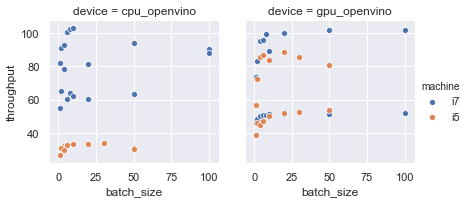

In [15]:
resnet = merged_data[merged_data['model'] == 'resnet50']
sns.set(rc={'figure.figsize':(12,12)})
g = sns.FacetGrid(resnet, col = 'device', hue = 'machine')
g.map(sns.scatterplot, 'batch_size', 'throughput')
g.add_legend()
plt.savefig("batch_size_throughput_resnet.svg")
plt.show()

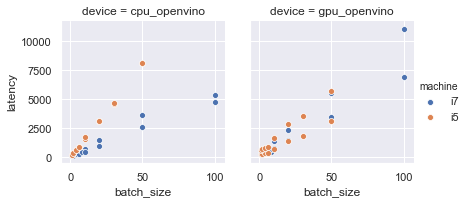

In [12]:
vit = merged_data[merged_data['model'] == 'vit_b_16']
sns.set(rc={'figure.figsize':(12,12)})
g = sns.FacetGrid(vit, col = 'device', hue = 'machine')
g.map(sns.scatterplot, 'batch_size', 'latency')
g.add_legend()
plt.savefig("batch_size_latency_vit.svg")
plt.show()

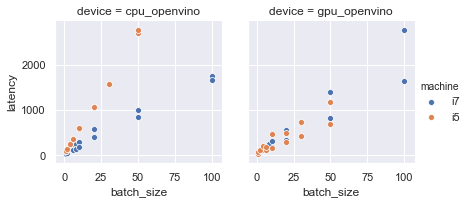

In [14]:
vgg11 = merged_data[merged_data['model'] == 'vgg11']
sns.set(rc={'figure.figsize':(12,12)})
g = sns.FacetGrid(vgg11, col = 'device', hue = 'machine')
g.map(sns.scatterplot, 'batch_size', 'latency')
g.add_legend()
plt.savefig("batch_size_latency_vg11.svg")
plt.show()

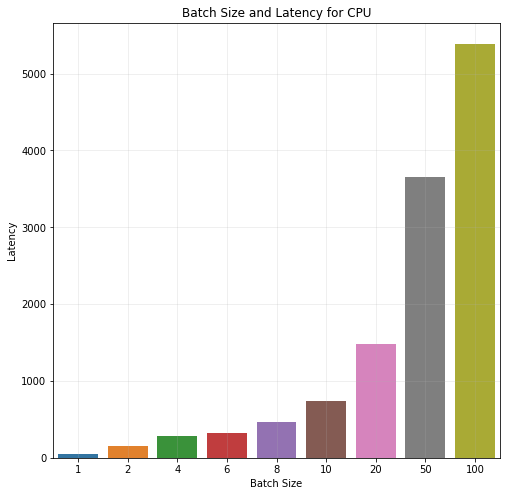

In [24]:
plt.figure(figsize = (8,8))
sns.barplot(x = precision_data[precision_data[0] == 'cpu_openvino'][1], y = precision_data[precision_data[0] == 'cpu_openvino'][2])
plt.title("Batch Size and Latency for CPU")
plt.grid(alpha = 0.25)
plt.xlabel("Batch Size")
plt.ylabel("Latency")
plt.savefig("batch_size_latency_cpu.svg")
plt.show()

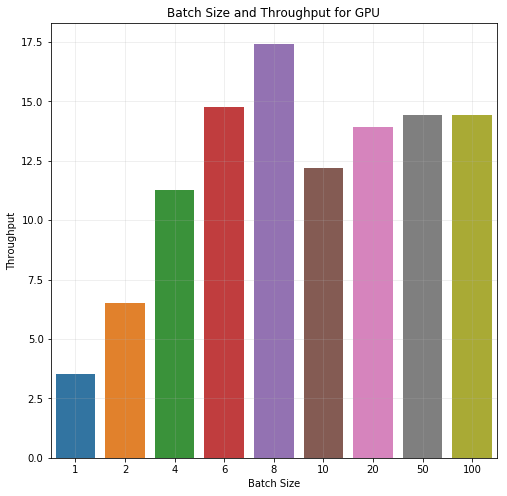

In [25]:
plt.figure(figsize=(8,8))
sns.barplot(x = precision_data[precision_data[0] == 'gpu_openvino'][1], y = precision_data[precision_data[0] == 'gpu_openvino'][3])
plt.title("Batch Size and Throughput for GPU")
plt.grid(alpha = 0.25)
plt.xlabel("Batch Size")
plt.ylabel("Throughput")
plt.savefig("batch_size_throughput_gpu.svg")
plt.show()

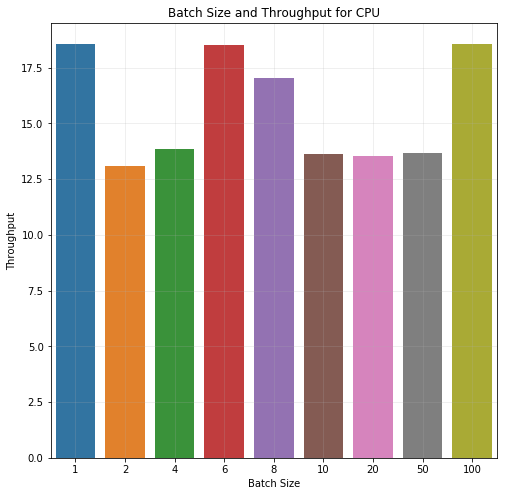

In [26]:
plt.figure(figsize=(8,8))
sns.barplot(x = precision_data[precision_data[0] == 'cpu_openvino'][1], y = precision_data[precision_data[0] == 'cpu_openvino'][3])
plt.title("Batch Size and Throughput for CPU")
plt.grid(alpha = 0.25)
plt.xlabel("Batch Size")
plt.ylabel("Throughput")
plt.savefig("batch_size_throughput_cpu.svg")
plt.show()